<a href="https://colab.research.google.com/github/maitreya-v/Transfer-Learning-ResNet50V2-EfficientNetB0/blob/master/TF_Transfer_learning_EfficientNetB0_Functional_API.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip

--2023-06-26 16:06:08--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 173.194.196.128, 173.194.197.128, 64.233.191.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|173.194.196.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 168546183 (161M) [application/zip]
Saving to: ‘10_food_classes_10_percent.zip’

10_food_classes_10_ 100%[===================>] 160.74M  93.3MB/s    in 1.7s    

2023-06-26 16:06:09 (93.3 MB/s) - ‘10_food_classes_10_percent.zip’ saved [168546183/168546183]



In [3]:
import zipfile

zipref = zipfile.ZipFile("/content/10_food_classes_10_percent.zip")
zipref.extractall()
zipref.close()

In [4]:
import tensorflow as tf
import matplotlib.pyplot as plt

In [5]:
train_directory = "/content/10_food_classes_10_percent/train"
test_directory = "/content/10_food_classes_10_percent/test"

train_dataset = tf.keras.utils.image_dataset_from_directory(
    train_directory,
    label_mode='categorical',
    batch_size=32,
    image_size=(224, 224),
    seed=42,
)


test_dataset = tf.keras.utils.image_dataset_from_directory(
    test_directory,
    label_mode='categorical',
    batch_size=32,
    image_size=(224, 224),
    seed=42,
)

Found 750 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


In [6]:
base_model = tf.keras.applications.efficientnet.EfficientNetB0(
    include_top = False,
    weights="imagenet",
)

base_model.trainable = False

inputs = tf.keras.Input(shape=(224,224,3))

x = base_model(inputs,training=False)

x = tf.keras.layers.GlobalAveragePooling2D()(x)

outputs = tf.keras.layers.Dense(10,activation="softmax")(x)

model = tf.keras.Model(inputs=inputs,outputs=outputs)

16705208/16705208 [==============================] - 0s 0us/step


In [15]:
model.compile(loss="categorical_crossentropy",
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

history = model.fit(train_dataset,
          epochs=5,
          steps_per_epoch=len(train_dataset),
          validation_data=test_dataset,
          validation_steps=int(0.25*len(test_dataset)))

Epoch 1/5
24/24 [==============================] - 12s 238ms/step - loss: 1.8769 - accuracy: 0.4373 - val_loss: 1.2608 - val_accuracy: 0.7648
Epoch 2/5
24/24 [==============================] - 5s 177ms/step - loss: 1.0700 - accuracy: 0.7533 - val_loss: 0.8167 - val_accuracy: 0.8372
Epoch 3/5
24/24 [==============================] - 7s 290ms/step - loss: 0.7591 - accuracy: 0.8267 - val_loss: 0.6268 - val_accuracy: 0.8783
Epoch 4/5
24/24 [==============================] - 5s 176ms/step - loss: 0.6096 - accuracy: 0.8640 - val_loss: 0.5641 - val_accuracy: 0.8816
Epoch 5/5
24/24 [==============================] - 5s 178ms/step - loss: 0.5155 - accuracy: 0.8933 - val_loss: 0.5247 - val_accuracy: 0.8816


In [16]:
model.evaluate(test_dataset)

79/79 [==============================] - 7s 86ms/step - loss: 0.5487 - accuracy: 0.8668


[0.5487121343612671, 0.8668000102043152]

In [8]:
for layer_number,layer in enumerate(base_model.layers):
  print(layer_number,layer.name)

0 input_1
1 rescaling
2 normalization
3 rescaling_1
4 stem_conv_pad
5 stem_conv
6 stem_bn
7 stem_activation
8 block1a_dwconv
9 block1a_bn
10 block1a_activation
11 block1a_se_squeeze
12 block1a_se_reshape
13 block1a_se_reduce
14 block1a_se_expand
15 block1a_se_excite
16 block1a_project_conv
17 block1a_project_bn
18 block2a_expand_conv
19 block2a_expand_bn
20 block2a_expand_activation
21 block2a_dwconv_pad
22 block2a_dwconv
23 block2a_bn
24 block2a_activation
25 block2a_se_squeeze
26 block2a_se_reshape
27 block2a_se_reduce
28 block2a_se_expand
29 block2a_se_excite
30 block2a_project_conv
31 block2a_project_bn
32 block2b_expand_conv
33 block2b_expand_bn
34 block2b_expand_activation
35 block2b_dwconv
36 block2b_bn
37 block2b_activation
38 block2b_se_squeeze
39 block2b_se_reshape
40 block2b_se_reduce
41 block2b_se_expand
42 block2b_se_excite
43 block2b_project_conv
44 block2b_project_bn
45 block2b_drop
46 block2b_add
47 block3a_expand_conv
48 block3a_expand_bn
49 block3a_expand_activation
5

In [9]:
base_model.summary()

Model: "efficientnetb0"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, None, None,  0           []                               
                                 3)]                                                              
                                                                                                  
 rescaling (Rescaling)          (None, None, None,   0           ['input_1[0][0]']                
                                3)                                                                
                                                                                                  
 normalization (Normalization)  (None, None, None,   7           ['rescaling[0][0]']              
                                3)                                                   

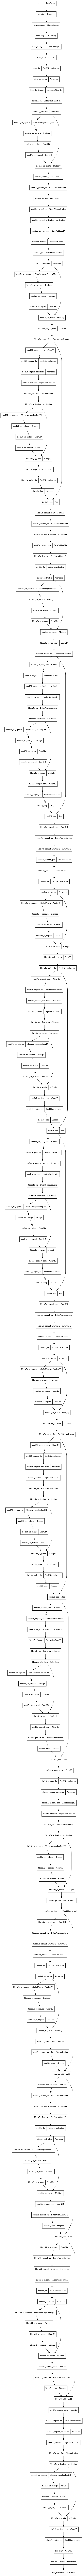

In [10]:
tf.keras.utils.plot_model(base_model)